# Poverty, GDP and Life Expectancy in Africa

Poverty, GDP, and life expectancy are all closely linked in Africa. Poverty is a major cause of ill health, and poor health can lead to poverty. In turn, a weak economy can make it difficult to address poverty and improve health.The average life expectancy in Africa is 62 years, which is significantly lower than the global average of 72 years. This is due to a number of factors, including high rates of poverty, HIV/AIDS, malaria, and other diseases.

Poverty is a major cause of ill health in Africa. People living in poverty often have limited access to clean water, sanitation, and healthcare. This can lead to the spread of diseases, such as diarrhea, pneumonia, and malaria. Poor nutrition is also a major problem in Africa, and it can lead to malnutrition, stunting, and other health problems.

Poor health can also lead to poverty. People who are sick often cannot work, which can lead to a loss of income. They may also have to spend money on healthcare, which can further impoverish them.

In [1]:
# importing the libraries needed

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [2]:
# Importing the dataset into Pandas DataFrame
# The population dataset is named Pop, the Gross Domestic Product is named Gdp, Country Code data is represented by Ccd
# Life expectancy is represented by Life

Pop = pd.read_excel('Downloads/distribution-of-population-between-different-poverty-thresholds-up-to-30-dollars.xlsx')
Gdp = pd.read_excel("Downloads/African Country GDP Data.xlsx")
Ccd = pd.read_excel('Downloads/Country Code Data.xlsx')
Life = pd.read_excel("Downloads/life-expectancy.xlsx")

In [3]:
# Change the Year columns into a datetime column

Pop["Year"] = pd.to_datetime(Pop["Year"],format="%Y")
Life["Year"] = pd.to_datetime(Life["Year"],format="%Y")

This code is converting the "Year" column in two data frames (Pop and Life) from a string format to a datetime format.

pd.to_datetime() is a pandas function that converts a given argument to a datetime object. In this case, it is being used to convert the "Year" column in each data frame.

The first argument passed to the function is the column to be converted (Pop["Year"] or Life["Year"]).

The second argument is the format parameter, which specifies the format of the string that is being converted to a datetime object. In this case, the format is "%Y", which means that the string represents a year in four digits. For example, "2021" would be converted to a datetime object representing the year 2021.

By converting the "Year" column to a datetime format, we can perform various time-based operations on the data frames, such as sorting by date or extracting information about specific dates.

In [4]:
# Check each individual dataset, to ensure they are inputted well enough, and check how they are laid out
Pop.head()


,Country Code,Year,$40 - total number of people above poverty line,$30-$40 - total number of people between poverty lines,$20-$30 - total number of people between poverty lines,$10-$20 - total number of people between poverty lines,$6.85-$10 - total number of people between poverty lines,$3.65-$6.85 - total number of people between poverty lines,$2.15-$3.65 - total number of people between poverty lines,$1-$2.15 - total number of people between poverty lines,$1 - total number of people below poverty line
0,DZA,1988-01-01,156887,156293,505149,3346519,4721041,9399430,4588806,1569347,0
1,DZA,1995-01-01,288,207792,720816,4492444,5764456,10598713,5313792,1591680,67807
2,DZA,2011-01-01,67878,310554,1157937,10208065,11508101,11935404,1306518,134231,32750
3,AGO,2000-01-01,281776,135165,503404,2183373,2272061,4537115,2972500,2221831,1288252
4,AGO,2008-01-01,124834,158806,460152,2864525,3103557,6811821,4997330,2744584,430027


In [5]:
Ccd.head(5)

,Country Code,Country Name,IncomeGroup,Region
0,AGO,Angola,Lower middle income,Middle Africa
1,BDI,Burundi,Low income,Eastern Africa
2,BEN,Benin,Lower middle income,Western Africa
3,BFA,Burkina Faso,Low income,Western Africa
4,BWA,Botswana,Upper middle income,Southern Africa


In [6]:
Life.head(5)

,Code,Year,Life expectancy at birth (historical)
0,DZA,1923-01-01,28.82
1,DZA,1933-01-01,31.22
2,DZA,1943-01-01,33.72
3,DZA,1950-01-01,42.40
4,DZA,1951-01-01,42.50


In [7]:
Gdp.head(5)


,African Country Code,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AGO,GDP (current US$),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.249982e+11,1.334016e+11,1.372444e+11,8.721930e+10,4.984049e+10,6.897277e+10,7.779294e+10,6.930911e+10,5.361907e+10,6.740429e+10
1,BDI,GDP (current US$),1.960000e+08,2.030000e+08,2.135000e+08,2.327500e+08,2.607500e+08,1.589950e+08,1.654446e+08,1.782971e+08,...,2.333341e+09,2.451607e+09,2.705783e+09,3.104004e+09,2.639321e+09,2.712324e+09,2.660124e+09,2.576519e+09,2.649672e+09,2.779813e+09
2,BEN,GDP (current US$),2.261956e+08,2.356682e+08,2.364349e+08,2.539276e+08,2.698190e+08,2.899087e+08,3.029253e+08,3.062220e+08,...,1.114136e+10,1.251785e+10,1.328453e+10,1.138816e+10,1.182107e+10,1.270166e+10,1.426241e+10,1.439169e+10,1.565155e+10,1.714492e+10
3,BFA,GDP (current US$),3.304428e+08,3.502472e+08,3.795670e+08,3.940406e+08,4.103216e+08,4.229168e+08,4.338898e+08,4.507540e+08,...,1.256102e+10,1.344430e+10,1.394302e+10,1.183216e+10,1.283336e+10,1.410696e+10,1.589007e+10,1.617816e+10,1.793361e+10,1.973762e+10
4,BWA,GDP (current US$),3.041231e+07,3.290234e+07,3.564321e+07,3.809115e+07,4.161397e+07,4.579087e+07,5.146444e+07,5.864644e+07,...,1.390751e+10,1.427175e+10,1.547006e+10,1.353074e+10,1.508258e+10,1.610518e+10,1.703190e+10,1.669593e+10,1.493007e+10,1.761479e+10


In [8]:
# fill all missing values with zeros
Gdp= Gdp.fillna(0)
Pop =Pop.fillna(0)
Life = Life.fillna(0)

This code is filling all missing values (NaN values) in the Gdp, Pop, and Life data frames with zeros.

fillna() is a method of pandas data frames that allows us to replace missing values with a specified value. In this case, the value being used to replace missing values is 0.

By filling missing values with zeros, we are assuming that the missing data points represent a lack of information, rather than an actual value of zero. This assumption may not always be accurate, and the appropriate method for handling missing data depends on the context and the specific requirements of the analysis.

In [9]:
Pop.shape, Gdp.shape, Life.shape, Ccd.shape

((239, 11), (54, 64), (3937, 3), (54, 4))

In [10]:
# Get a description of the various columns available in the dataset
Gdp.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,...,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01
mean,5.986193e+08,6.165706e+08,6.590575e+08,7.599572e+08,7.543821e+08,9.446580e+08,1.006125e+09,1.022374e+09,1.098726e+09,1.243994e+09,...,4.498239e+10,4.710838e+10,4.892810e+10,4.427370e+10,4.199690e+10,4.324178e+10,4.522008e+10,4.641631e+10,4.504621e+10,5.029922e+10
std,1.415153e+09,1.464130e+09,1.575174e+09,1.833301e+09,1.850630e+09,2.102354e+09,2.271510e+09,2.397417e+09,2.584814e+09,2.942054e+09,...,9.446311e+10,9.734251e+10,1.022396e+11,9.194250e+10,8.301551e+10,8.039712e+10,8.602157e+10,8.979738e+10,8.823359e+10,9.774102e+10
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.819724e+09,4.582133e+09,4.685029e+09,4.190331e+09,3.710101e+09,3.890269e+09,4.230145e+09,4.181250e+09,4.002492e+09,4.217512e+09
50%,1.155778e+08,1.247655e+08,1.286187e+08,1.363174e+08,1.540646e+08,1.928092e+08,2.183749e+08,2.536062e+08,2.482086e+08,2.667715e+08,...,1.250153e+10,1.334350e+10,1.395261e+10,1.194403e+10,1.183484e+10,1.303573e+10,1.401122e+10,1.424818e+10,1.388649e+10,1.534588e+10
75%,5.220344e+08,5.851305e+08,6.168974e+08,6.853142e+08,7.297517e+08,9.110470e+08,9.995199e+08,1.054104e+09,1.172548e+09,1.226188e+09,...,3.476550e+10,4.050233e+10,4.572889e+10,4.381448e+10,4.255427e+10,4.112779e+10,4.200794e+10,4.134733e+10,4.209668e+10,4.470808e+10
max,8.748597e+09,9.225996e+09,9.813996e+09,1.085420e+10,1.195600e+10,1.306899e+10,1.421139e+10,1.582139e+10,1.712479e+10,1.925699e+10,...,4.639710e+11,5.201172e+11,5.741838e+11,4.930268e+11,4.046490e+11,3.814488e+11,4.217392e+11,4.481200e+11,4.321989e+11,4.408336e+11


In [11]:
# Get a description of the various columns available in the dataset
Pop.describe()

,$40 - total number of people above poverty line,$30-$40 - total number of people between poverty lines,$20-$30 - total number of people between poverty lines,$10-$20 - total number of people between poverty lines,$6.85-$10 - total number of people between poverty lines,$3.65-$6.85 - total number of people between poverty lines,$2.15-$3.65 - total number of people between poverty lines,$1-$2.15 - total number of people between poverty lines,$1 - total number of people below poverty line
count,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02
mean,1.078777e+05,8.020983e+04,2.148499e+05,1.183895e+06,1.721102e+06,5.375856e+06,5.392934e+06,5.692763e+06,2.252561e+06
std,4.511499e+05,2.225459e+05,4.335281e+05,1.943922e+06,3.112569e+06,9.757463e+06,8.998711e+06,8.836640e+06,4.145825e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.368000e+03,6.290000e+02,3.150000e+02,0.000000e+00
25%,2.553500e+03,4.414000e+03,1.422700e+04,1.132355e+05,1.818250e+05,5.808080e+05,8.781985e+05,6.339600e+05,8.058750e+04
50%,1.253200e+04,1.358000e+04,5.301800e+04,2.951360e+05,4.388520e+05,1.642352e+06,2.582190e+06,3.073586e+06,1.062346e+06
75%,5.216800e+04,5.727550e+04,1.990360e+05,1.388238e+06,1.746882e+06,5.204416e+06,5.341933e+06,6.200864e+06,2.907202e+06
max,3.918441e+06,1.722657e+06,2.975614e+06,1.083349e+07,1.953499e+07,5.362082e+07,6.387384e+07,5.357498e+07,3.552553e+07


In [12]:
# Get a description of the various columns available in the dataset
Life.describe()

,Life expectancy at birth (historical)
count,3937.000000
mean,51.123172
std,10.307799
min,12.400000
25%,43.400000
50%,50.700000
75%,58.700000
max,76.600000


Life.describe() is a method in pandas that provides a statistical summary of a data frame, including its descriptive statistics such as count, mean, standard deviation, minimum, maximum, and percentiles for all numerical columns in the data frame Life.

When executed, the method computes and returns a DataFrame that contains the following summary statistics:

Count: the number of non-missing values in each numerical column of the data frame.
Mean: the arithmetic average of each numerical column of the data frame.
Standard deviation (std): a measure of the dispersion of a set of values. It indicates how much variation or dispersion exists from the mean (average) value.
Minimum: the smallest value in each numerical column of the data frame.
25th percentile (25%): the value below which 25% of the data falls in each numerical column of the data frame.
50th percentile (50%): the median, which is the value below which 50% of the data falls in each numerical column of the data frame.
75th percentile (75%): the value below which 75% of the data falls in each numerical column of the data frame.
Maximum: the largest value in each numerical column of the data frame.
This method is useful for getting a quick overview of the numerical data in a data frame, including any outliers or unusual values, as well as for identifying any potential issues such as missing values or unexpected distributions.

In [13]:
# Get the mean GDP for africa [per based on the available data]

mean_Gdp = Gdp.mean()

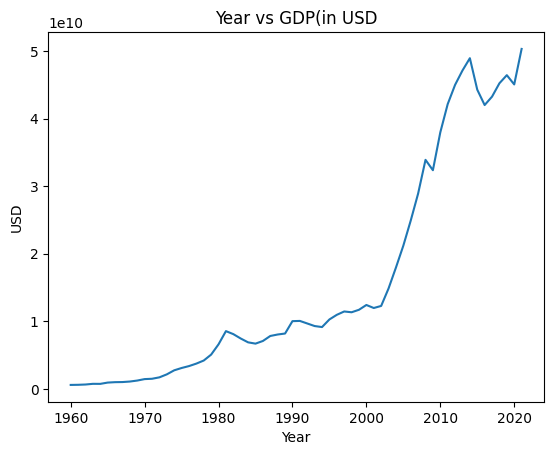

In [14]:
# A plot of Mean GDP over the year
sns.lineplot(mean_Gdp)
plt.title("Year vs GDP(in USD") 
plt.xlabel("Year")
plt.ylabel("USD")

plt.show()

This code uses the seaborn (sns) library to create a line plot of the median GDP over the years.

Assuming that median_Gdp is a pandas series or data frame containing the median GDP values for each year, the line plot is created using the lineplot() function from the seaborn library.

The lineplot() function takes the x-axis values as the index of the pandas series or data frame, and the y-axis values as the values of the series or data frame. In this case, the x-axis represents the years and the y-axis represents the median GDP values for each year.

The plt.title(), plt.xlabel(), and plt.ylabel() functions are used to set the title, x-axis label, and y-axis label of the plot, respectively.

Finally, the plt.show() function is used to display the plot.

Note that this code assumes that all necessary libraries have already been imported, and that the median_Gdp data has already been prepared.

### Merging the dataset together


In [15]:
# ?Country Code + Gross Dosmetic Product
Gdp1 = pd.merge(Ccd, Gdp, on=Ccd["Country Code"]).drop(["key_0","African Country Code"], axis = 1)
Gdp1['Mean GDP'] = Gdp1.mean(axis=1)
Gdp1.head()

,Country Code,Country Name,IncomeGroup,Region,Indicator Name,1960,1961,1962,1963,1964,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Mean GDP
0,AGO,Angola,Lower middle income,Middle Africa,GDP (current US$),0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.334016e+11,1.372444e+11,8.721930e+10,4.984049e+10,6.897277e+10,7.779294e+10,6.930911e+10,5.361907e+10,6.740429e+10,2.570106e+10
1,BDI,Burundi,Low income,Eastern Africa,GDP (current US$),1.960000e+08,2.030000e+08,2.135000e+08,2.327500e+08,2.607500e+08,...,2.451607e+09,2.705783e+09,3.104004e+09,2.639321e+09,2.712324e+09,2.660124e+09,2.576519e+09,2.649672e+09,2.779813e+09,1.111593e+09
2,BEN,Benin,Lower middle income,Western Africa,GDP (current US$),2.261956e+08,2.356682e+08,2.364349e+08,2.539276e+08,2.698190e+08,...,1.251785e+10,1.328453e+10,1.138816e+10,1.182107e+10,1.270166e+10,1.426241e+10,1.439169e+10,1.565155e+10,1.714492e+10,4.250500e+09
3,BFA,Burkina Faso,Low income,Western Africa,GDP (current US$),3.304428e+08,3.502472e+08,3.795670e+08,3.940406e+08,4.103216e+08,...,1.344430e+10,1.394302e+10,1.183216e+10,1.283336e+10,1.410696e+10,1.589007e+10,1.617816e+10,1.793361e+10,1.973762e+10,4.696434e+09
4,BWA,Botswana,Upper middle income,Southern Africa,GDP (current US$),3.041231e+07,3.290234e+07,3.564321e+07,3.809115e+07,4.161397e+07,...,1.427175e+10,1.547006e+10,1.353074e+10,1.508258e+10,1.610518e+10,1.703190e+10,1.669593e+10,1.493007e+10,1.761479e+10,5.351144e+09


This code is performing a merge operation between two pandas data frames: Ccd and Gdp.

The resulting merged data frame, Gdp1, contains data from both data frames, joined on the common column "Country Code".

The merge() method of pandas is being used to perform the merge operation. The on parameter is used to specify the common column to merge on, which in this case is "Country Code".

The drop() method is then used to remove two columns from the resulting merged data frame: "key_0" and "African Country Code". These columns are not needed and were included as a result of the merge operation.

Assuming that Ccd contains information about country codes and Gdp contains information about Gross Domestic Product (GDP) for each country, this code is creating a new data frame Gdp1 that combines these two data sources based on the common country codes. The resulting data frame will contain information about GDP for each country, along with its corresponding country code.

In [16]:
# ?Country Code + Population Data

Pop1 = Ccd.merge(Pop)
Pop1

,Country Code,Country Name,IncomeGroup,Region,Year,$40 - total number of people above poverty line,$30-$40 - total number of people between poverty lines,$20-$30 - total number of people between poverty lines,$10-$20 - total number of people between poverty lines,$6.85-$10 - total number of people between poverty lines,$3.65-$6.85 - total number of people between poverty lines,$2.15-$3.65 - total number of people between poverty lines,$1-$2.15 - total number of people between poverty lines,$1 - total number of people below poverty line
0,AGO,Angola,Lower middle income,Middle Africa,2000-01-01,281776,135165,503404,2183373,2272061,4537115,2972500,2221831,1288252
1,AGO,Angola,Lower middle income,Middle Africa,2008-01-01,124834,158806,460152,2864525,3103557,6811821,4997330,2744584,430027
2,AGO,Angola,Lower middle income,Middle Africa,2018-01-01,173444,177875,396233,2733595,3304800,7724746,6710470,6874939,2713685
3,BDI,Burundi,Low income,Eastern Africa,1992-01-01,57,0,0,14545,55075,327600,1020737,2848654,1418901
4,BDI,Burundi,Low income,Eastern Africa,1998-01-01,789,1231,4503,51055,73368,226911,913823,2531224,2382660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,ZMB,Zambia,Low income,Eastern Africa,2010-01-01,29927,21654,83940,367940,442840,1382352,1963137,4351209,4962987
235,ZMB,Zambia,Low income,Eastern Africa,2015-01-01,41207,45886,106971,588041,687191,2095933,2571804,4290804,5451533
236,ZWE,Zimbabwe,Lower middle income,Eastern Africa,2011-01-01,63288,71302,206805,1089189,1413244,3879640,3388252,2737250,45353
237,ZWE,Zimbabwe,Lower middle income,Eastern Africa,2017-01-01,33821,49798,134438,855210,1189068,3206858,3897628,4528257,341521


This code is performing a merge operation between two pandas data frames: Ccd and Pop.

The resulting merged data frame, Pop1, contains data from both data frames, joined on the common column "Country Code".

The merge() method of pandas is being used to perform the merge operation. By default, merge() performs an inner join, which means that only the rows with matching values in both data frames will be included in the resulting merged data frame.

Assuming that Ccd contains information about country codes and Pop contains information about population data for each country, this code is creating a new data frame Pop1 that combines these two data sources based on the common country codes. The resulting data frame will contain information about population data for each country, along with its corresponding country code.

In [17]:
# Calculating the Pre Poverty Rate and Poverty Rate

Pop1['PrePoverty Rate'] = Pop1.iloc[:,6:-2].sum(axis=1)/Pop1.iloc[:,:].sum(axis=1)*100
Pop1['Poverty Rate'] = (Pop1['$1 - total number of people below poverty line']/Pop1.iloc[:,:].sum(axis=1))*100
Pop1 
 

,Country Code,Country Name,IncomeGroup,Region,Year,$40 - total number of people above poverty line,$30-$40 - total number of people between poverty lines,$20-$30 - total number of people between poverty lines,$10-$20 - total number of people between poverty lines,$6.85-$10 - total number of people between poverty lines,$3.65-$6.85 - total number of people between poverty lines,$2.15-$3.65 - total number of people between poverty lines,$1-$2.15 - total number of people between poverty lines,$1 - total number of people below poverty line,PrePoverty Rate,Poverty Rate
0,AGO,Angola,Lower middle income,Middle Africa,2000-01-01,281776,135165,503404,2183373,2272061,4537115,2972500,2221831,1288252,76.872530,7.857325
1,AGO,Angola,Lower middle income,Middle Africa,2008-01-01,124834,158806,460152,2864525,3103557,6811821,4997330,2744584,430027,84.792126,1.982082
2,AGO,Angola,Lower middle income,Middle Africa,2018-01-01,173444,177875,396233,2733595,3304800,7724746,6710470,6874939,2713685,68.315042,8.807847
3,BDI,Burundi,Low income,Eastern Africa,1992-01-01,57,0,0,14545,55075,327600,1020737,2848654,1418901,24.939579,24.956073
4,BDI,Burundi,Low income,Eastern Africa,1998-01-01,789,1231,4503,51055,73368,226911,913823,2531224,2382660,20.546081,38.519561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,ZMB,Zambia,Low income,Eastern Africa,2010-01-01,29927,21654,83940,367940,442840,1382352,1963137,4351209,4962987,31.323441,36.476412
235,ZMB,Zambia,Low income,Eastern Africa,2015-01-01,41207,45886,106971,588041,687191,2095933,2571804,4290804,5451533,38.388337,34.330832
236,ZWE,Zimbabwe,Lower middle income,Eastern Africa,2011-01-01,63288,71302,206805,1089189,1413244,3879640,3388252,2737250,45353,77.929117,0.351726
237,ZWE,Zimbabwe,Lower middle income,Eastern Africa,2017-01-01,33821,49798,134438,855210,1189068,3206858,3897628,4528257,341521,65.556387,2.398884


In [18]:
# Country Code + Life Expectancy


Life1 = Ccd.merge(Life, left_on=Ccd["Country Code"], right_on=Life["Code"]).drop(["key_0","Code"], axis = 1)
Life1

,Country Code,Country Name,IncomeGroup,Region,Year,Life expectancy at birth (historical)
0,AGO,Angola,Lower middle income,Middle Africa,1940-01-01,26.98
1,AGO,Angola,Lower middle income,Middle Africa,1950-01-01,36.30
2,AGO,Angola,Lower middle income,Middle Africa,1951-01-01,36.40
3,AGO,Angola,Lower middle income,Middle Africa,1952-01-01,36.50
4,AGO,Angola,Lower middle income,Middle Africa,1953-01-01,36.70
...,...,...,...,...,...,...
3932,ZWE,Zimbabwe,Lower middle income,Eastern Africa,2017-01-01,60.70
3933,ZWE,Zimbabwe,Lower middle income,Eastern Africa,2018-01-01,61.40
3934,ZWE,Zimbabwe,Lower middle income,Eastern Africa,2019-01-01,61.30
3935,ZWE,Zimbabwe,Lower middle income,Eastern Africa,2020-01-01,61.10


In [19]:
# Merge all the Tables into one

Total_dataset = Gdp1.merge(Pop1).merge(Life1)
Total_dataset.head(5)

,Country Code,Country Name,IncomeGroup,Region,Indicator Name,1960,1961,1962,1963,1964,...,$20-$30 - total number of people between poverty lines,$10-$20 - total number of people between poverty lines,$6.85-$10 - total number of people between poverty lines,$3.65-$6.85 - total number of people between poverty lines,$2.15-$3.65 - total number of people between poverty lines,$1-$2.15 - total number of people between poverty lines,$1 - total number of people below poverty line,PrePoverty Rate,Poverty Rate,Life expectancy at birth (historical)
0,AGO,Angola,Lower middle income,Middle Africa,GDP (current US$),0.0,0.0,0.0,0.0,0.0,...,503404,2183373,2272061,4537115,2972500,2221831,1288252,76.872530,7.857325,46.0
1,AGO,Angola,Lower middle income,Middle Africa,GDP (current US$),0.0,0.0,0.0,0.0,0.0,...,460152,2864525,3103557,6811821,4997330,2744584,430027,84.792126,1.982082,54.6
2,AGO,Angola,Lower middle income,Middle Africa,GDP (current US$),0.0,0.0,0.0,0.0,0.0,...,396233,2733595,3304800,7724746,6710470,6874939,2713685,68.315042,8.807847,62.1
3,BDI,Burundi,Low income,Eastern Africa,GDP (current US$),195999990.0,202999992.0,213500006.0,232749998.0,260750008.0,...,0,14545,55075,327600,1020737,2848654,1418901,24.939579,24.956073,43.9
4,BDI,Burundi,Low income,Eastern Africa,GDP (current US$),195999990.0,202999992.0,213500006.0,232749998.0,260750008.0,...,4503,51055,73368,226911,913823,2531224,2382660,20.546081,38.519561,46.6


This code is performing a merge operation between two pandas data frames: Ccd and Life.

The resulting merged data frame, Life1, contains data from both data frames, joined on the common column "Country Code" from Ccd and "Code" from Life.

The merge() method of pandas is being used to perform the merge operation. The left_on and right_on parameters are used to specify the columns to merge on from each data frame.

The resulting merged data frame will include only the rows with matching values in both data frames. The drop() method is then used to remove two columns from the resulting merged data frame: "key_0" and "Code". These columns are not needed and were included as a result of the merge operation.

Assuming that Ccd contains information about country codes and Life contains information about life expectancy data for each country, this code is creating a new data frame Life1 that combines these two data sources based on the common country codes. The resulting data frame will contain information about life expectancy data for each country, along with its corresponding country code.

## Exploratory Data Analysis

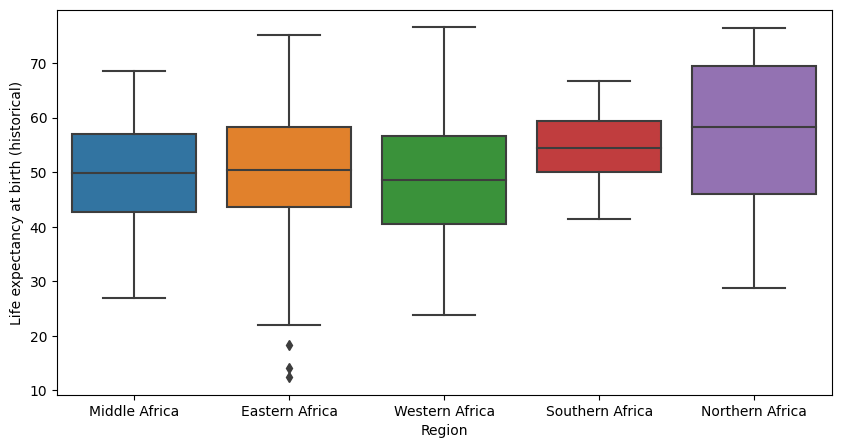

In [20]:
# plot life Expectancy per region

plt.figure(figsize=(10,5))
sns.boxplot(x="Region", y="Life expectancy at birth (historical)",data = Life1)
plt.show()

This code is creating a box plot of life expectancy data by region using the seaborn library.

The plt.figure() function is used to set the size of the plot, with figsize parameter specifying the width and height of the figure in inches.

The sns.boxplot() function is then used to create the box plot. The x-axis represents the regions, and the y-axis represents the life expectancy data for each region.

The data parameter specifies the data frame that contains the data to be plotted, which in this case is Life1.

Finally, the plt.show() function is used to display the plot.

This plot shows the distribution of life expectancy data for each region, as well as any outliers that may exist within each region. It provides a quick way to compare the distribution of life expectancy data across different regions.

In [21]:
# Group the population data by Region

Grouped_pop1 = Pop1.groupby("Region").mean()
Grouped_pop1.reset_index()

,Region,$40 - total number of people above poverty line,$30-$40 - total number of people between poverty lines,$20-$30 - total number of people between poverty lines,$10-$20 - total number of people between poverty lines,$6.85-$10 - total number of people between poverty lines,$3.65-$6.85 - total number of people between poverty lines,$2.15-$3.65 - total number of people between poverty lines,$1-$2.15 - total number of people between poverty lines,$1 - total number of people below poverty line,PrePoverty Rate,Poverty Rate
0,Eastern Africa,28900.303797,30931.443038,91367.341772,5.254310e+05,7.688581e+05,3.128762e+06,5.209533e+06,7.239383e+06,3.024569e+06,49.739937,16.999159
1,Middle Africa,44853.714286,41067.666667,136942.428571,7.681879e+05,9.374489e+05,2.670013e+06,3.002620e+06,4.197377e+06,3.380075e+06,62.321090,13.557785
2,Northern Africa,186949.000000,225506.370370,753939.481481,4.642911e+06,6.970621e+06,1.816297e+07,7.926313e+06,1.580405e+06,7.066315e+04,93.901737,0.262423
3,Southern Africa,696899.391304,349654.521739,605872.173913,1.562543e+06,1.243112e+06,2.879519e+06,2.747029e+06,2.799232e+06,8.434973e+05,60.000772,13.969977
4,Western Africa,16645.134831,19476.617978,78246.011236,7.192445e+05,1.282234e+06,4.774810e+06,6.034956e+06,6.668100e+06,2.327316e+06,57.334714,12.943015


This code is grouping the population data by region using the groupby() method of pandas.

The groupby() method is used to group the rows of the Pop1 data frame by the values in the "Region" column.

The mean() method is then called on the resulting grouped data to calculate the mean population for each region. This will result in a new data frame with the mean population for each region.

Finally, the reset_index() method is called to reset the index of the resulting data frame. This is done to convert the grouped data from a series to a data frame with an index and columns.

Assuming that Pop1 contains population data for each country, along with its corresponding region, this code is creating a new data frame Grouped_pop1 that shows the mean population for each region.

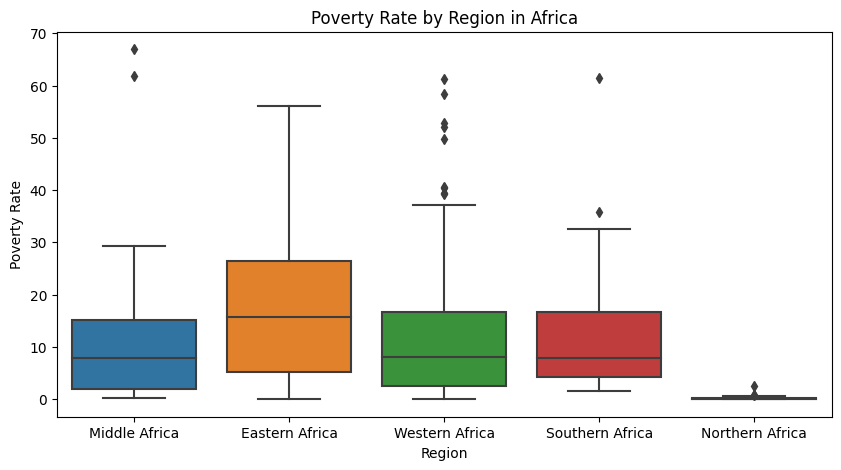

In [22]:
# Plot of poverty per region

plt.figure(figsize=(10,5))
sns.boxplot(data=Pop1,x="Region", y="Poverty Rate",)
plt.title("Poverty Rate by Region in Africa")
plt.show()

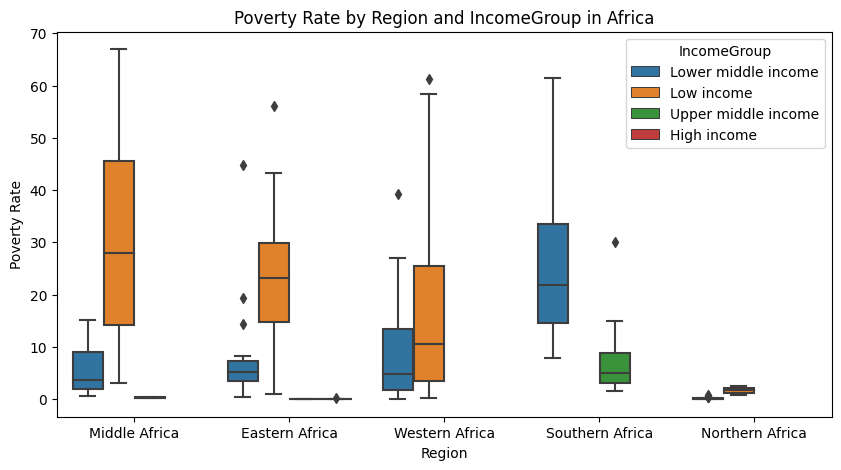

In [23]:
# Plot of poverty per region

plt.figure(figsize=(10,5))
sns.boxplot(data=Pop1,x="Region", y="Poverty Rate", hue = "IncomeGroup")
plt.title("Poverty Rate by Region and IncomeGroup in Africa")
plt.show()

Middle Africa have the highest number of people living below the poverty line, followed by East Africa, The Western region follows swifly, and South Africa, North Africa have lss than 1000000 living below the poverty line

This code is creating a bar plot of poverty data by region using the seaborn library.

The plt.figure() function is used to set the size of the plot, with figsize parameter specifying the width and height of the figure in inches.

The sns.barplot() function is then used to create the bar plot. The x-axis represents the regions, and the y-axis represents the number of people below the poverty line for each region.

The data parameter specifies the data frame that contains the data to be plotted, which in this case is Pop1.

Finally, the plt.title() and plt.show() functions are used to add a title to the plot and display it.

This plot shows the number of people below the poverty line for each region, providing a quick way to compare poverty levels across different regions in Africa.

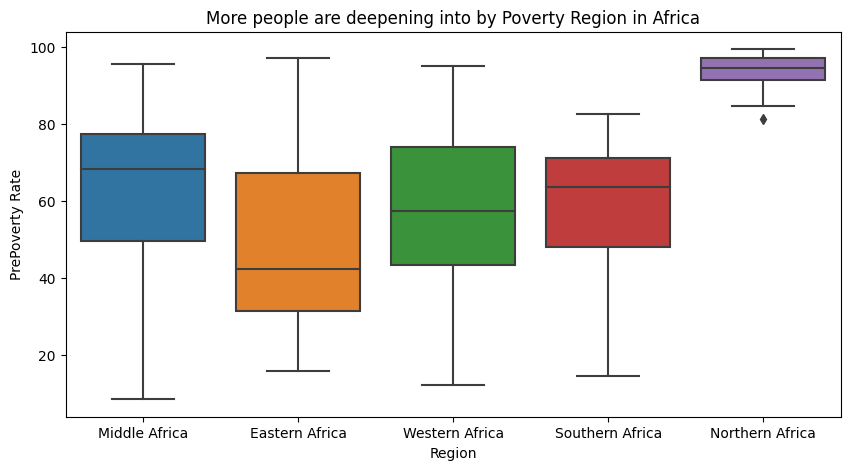

In [24]:
# Plot of  Prepoverty per region

plt.figure(figsize=(10,5))
sns.boxplot(data=Pop1,x="Region", y="PrePoverty Rate")
plt.title("More people are deepening into by Poverty Region in Africa")
plt.show()

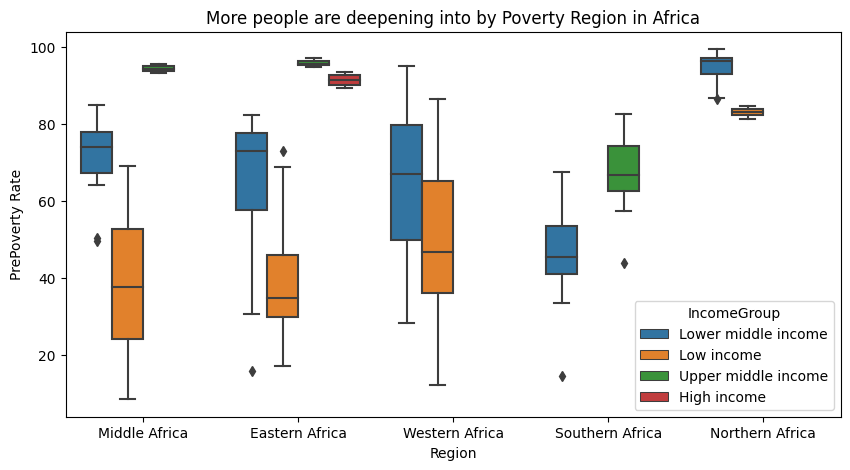

In [25]:
# Plot of  Prepoverty per region

plt.figure(figsize=(10,5))
sns.boxplot(data=Pop1,x="Region", y="PrePoverty Rate", hue = "IncomeGroup")
plt.title("More people are deepening into by Poverty Region in Africa")
plt.show()

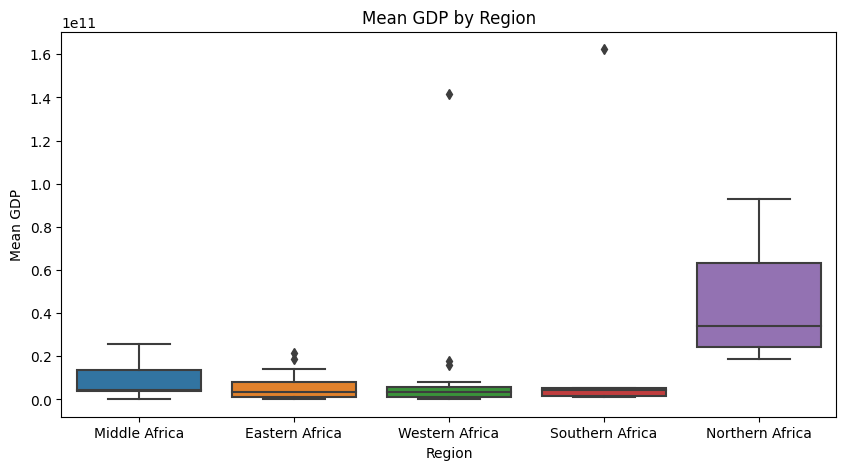

In [26]:
# plot Region VS Mean GDP 

plt.figure(figsize=(10,5))
sns.boxplot(x="Region", y="Mean GDP",data = Gdp1)
plt.title("Mean GDP by Region")
plt.show()

This is more like a reverse order of what we saw in the last chart, The north Africa sub region have the highest median GDP when calculated, followed by Southern Africa, West Africa, Eastern and Middle Africa following out so well

This code is aggregating the GDP data by region using the groupby() method of pandas.

The groupby() method is used to group the rows of the Gdp1 data frame by the values in the "Region" column.

The mean() method is then called on the resulting grouped data to calculate the mean GDP for each region. This will result in a new data frame with the mean GDP for each region.

The .T attribute is then used to transpose the resulting data frame. This is done to switch the rows and columns of the data frame, so that the years become the columns and the regions become the rows.

Finally, the sns.lineplot() function is used to create a line plot of the mean GDP for each region over time. The x-axis represents the years, and the y-axis represents the mean GDP for each region.

The plt.title(), plt.xlabel(), and plt.ylabel() functions are used to add a title and labels to the plot, and plt.show() is used to display the plot.

This plot shows the trend of the mean GDP for each region over time, providing a quick way to compare the economic growth of different regions in Africa.







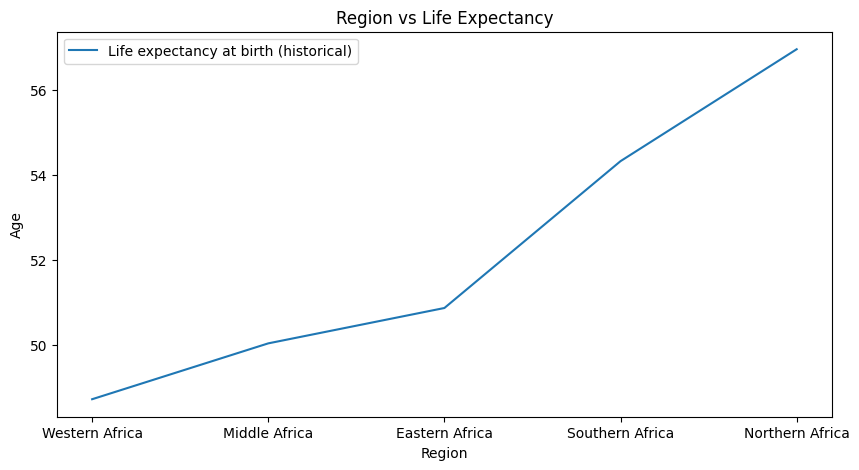

In [27]:
# Aggreagting the Life expectancy by the Region

Grouped_Life1 = Life1.groupby("Region").mean().sort_values("Life expectancy at birth (historical)", ascending=True)
Grouped_Life1
plt.figure(figsize=(10,5))

sns.lineplot(data = Grouped_Life1,)
plt.title("Region vs Life Expectancy")
plt.xlabel('Region')
plt.ylabel('Age')
plt.show()




This code is aggregating the life expectancy data by region using the groupby() method of pandas.

The groupby() method is used to group the rows of the Life1 data frame by the values in the "Region" column.

The mean() method is then called on the resulting grouped data to calculate the mean life expectancy for each region. This will result in a new data frame with the mean life expectancy for each region.

The sort_values() method is used to sort the resulting data frame in descending order of life expectancy, so that the regions with the highest life expectancy appear first.

The resulting data frame is then displayed using the Grouped_Life1 variable.

Finally, the sns.lineplot() function is used to create a line plot of the mean life expectancy for each region. The x-axis represents the regions, and the y-axis represents the mean life expectancy for each region.

The plt.title(), plt.xlabel(), and plt.ylabel() functions are used to add a title and labels to the plot, and plt.show() is used to display the plot.

This plot shows the mean life expectancy for each region, providing a quick way to compare the life expectancy of different regions in Africa.






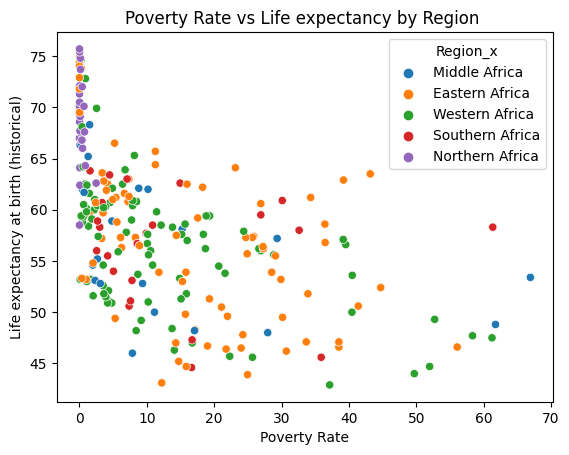

In [50]:
# A scatter plot of Poverty index vs life expectancy

sns.scatterplot(x="Poverty Rate", y="Life expectancy at birth (historical)", 
                hue="Region_x", data=Pop1.merge(Life1, on=["Country Code", "Year"]))
plt.title("Poverty Rate vs Life expectancy by Region ")
plt.show()


This chart shows that with increasing poverty, life expectancy decreases

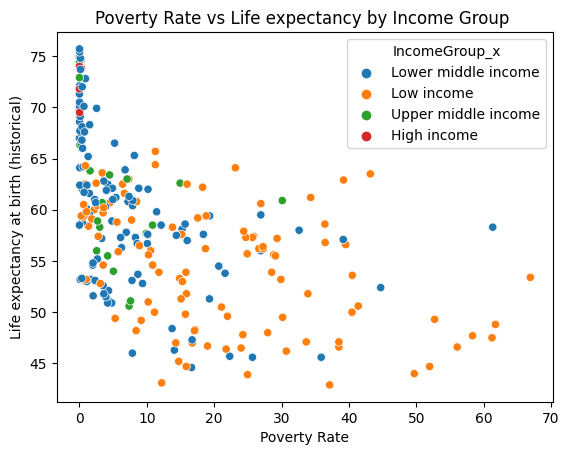

In [29]:
# A scatter plot of Poverty index vs life expectancy

sns.scatterplot(x="Poverty Rate", y="Life expectancy at birth (historical)", 
                hue="IncomeGroup_x", data=Pop1.merge(Life1, on=["Country Code", "Year"]))
plt.title("Poverty Rate vs Life expectancy by Income Group ")
plt.show()


The lower they are on the income group they are less likely to have a higher life expectancy

This code creates a scatter plot of poverty index versus life expectancy using the sns.scatterplot() function.

The x-axis represents the poverty index, which is given by the column "$1 - total number of people below poverty line" in the Pop1 data frame.

The y-axis represents the life expectancy at birth, which is given by the column "Life expectancy at birth (historical)" in the Life1 data frame.

The merge() function is used to combine the Pop1 and Life1 data frames on the columns "Country Code" and "Year".

The hue parameter is used to color-code the data points according to the region of each country, which is given by the column "Region_x" in the merged data frame.

The resulting scatter plot shows the relationship between poverty and life expectancy in different regions of Africa. Each data point represents a country, and the color of the point indicates the region to which the country belongs. The scatter plot can be used to identify any patterns or trends in the data, such as whether countries with higher poverty indices tend to have lower life expectancies.


### By Countries

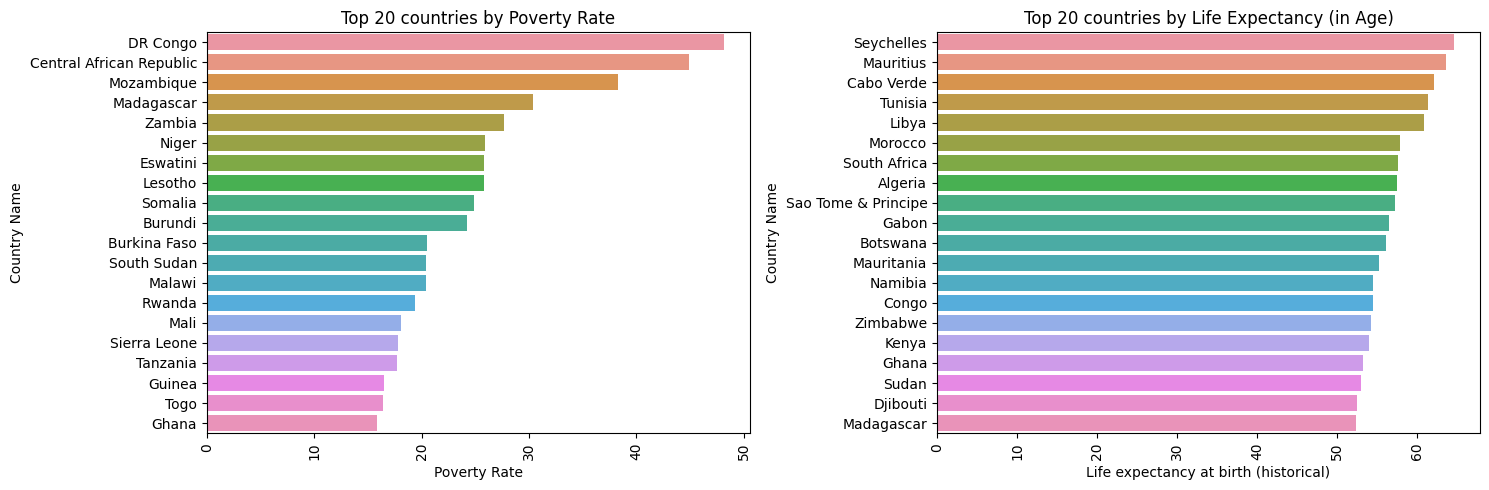

In [30]:
# Group statistics by country to analyse them

Group_Pop_Cont = Pop1.groupby("Country Name").mean().reset_index().sort_values(by = "Poverty Rate",
                                                                               ascending=False).head(20)
Group_Life_Cont = Life1.groupby("Country Name").mean().reset_index().sort_values(
    by="Life expectancy at birth (historical)",ascending=False).head(20)


# Create a figure with two subplots
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))

# Plot the first bar chart on the left subplot
sns.barplot(x='Poverty Rate', y='Country Name', data=Group_Pop_Cont, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_title('Top 20 countries by Poverty Rate')

# Plot the second bar chart on the right subplot
sns.barplot(x='Life expectancy at birth (historical)', y='Country Name', data=Group_Life_Cont, ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_title('Top 20 countries by Life Expectancy (in Age)')

plt.tight_layout()

# Display the figure
plt.show()

This code performs the following tasks:

Groups the population data by country name and calculates the mean of each column. It then sorts the data by the poverty index in descending order and selects the top 20 countries with the highest poverty index. This is stored in the variable Group_Pop_Cont.
Groups the life expectancy data by country name and calculates the mean of each column. It then sorts the data by life expectancy in descending order and selects the top 20 countries with the highest life expectancy. This is stored in the variable Group_Life_Cont.
Creates a figure with two subplots.
Plots a bar chart of the top 20 countries with the highest poverty index on the left subplot.
Plots a bar chart of the top 20 countries with the highest life expectancy on the right subplot.
Sets the x-tick labels to rotate by 90 degrees.
Sets the titles for the subplots.
Displays the figure.

### By Region 

<function matplotlib.pyplot.show(close=None, block=None)>

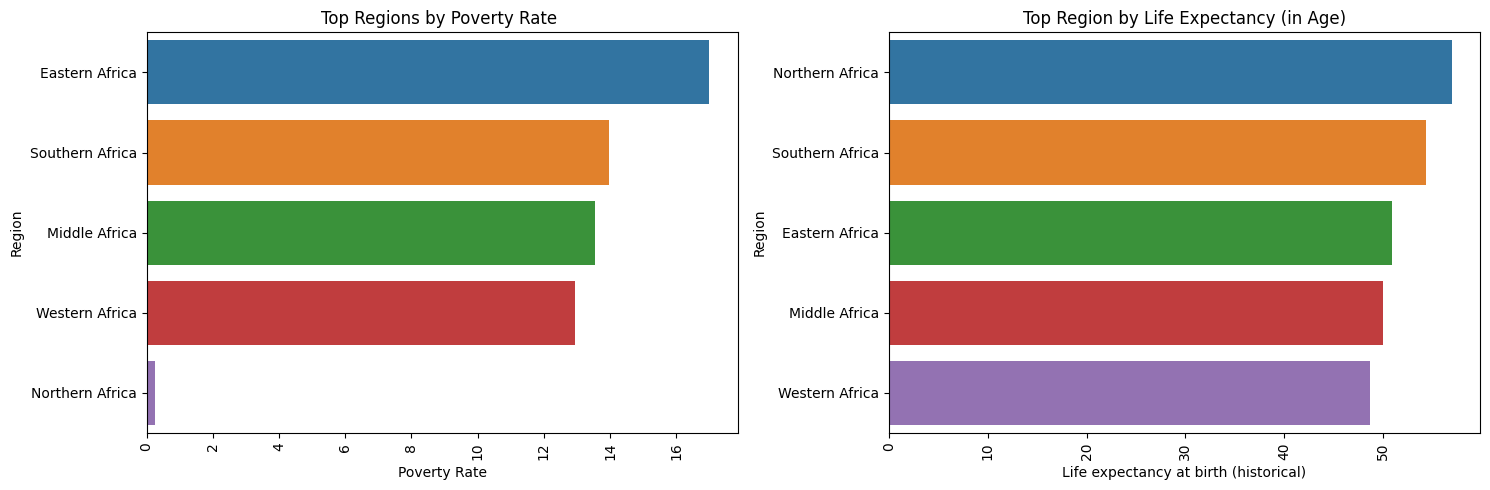

In [31]:
# Group Population and Life expectancy data by Region and  sort their values the poverty Rate

Group_Pop_Reg = Pop1.groupby("Region").mean().reset_index().sort_values(by = "Poverty Rate",
                                                                               ascending=False)
Group_Life_Reg = Life1.groupby("Region").mean().reset_index().sort_values(
    by="Life expectancy at birth (historical)",ascending=False)


# Create a figure with two subplots
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))

# Plot the first bar chart on the left subplot
sns.barplot(x='Poverty Rate', y='Region', data=Group_Pop_Reg, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_title('Top Regions by Poverty Rate ')

# Plot the second bar chart on the right subplot
sns.barplot(x='Life expectancy at birth (historical)', y='Region', data=Group_Life_Reg, ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_title('Top Region by Life Expectancy (in Age)')

plt.tight_layout()

# Display the figure
plt.show

This code appears to be analyzing poverty, life expectancy

The code is grouping the population and life expectancy data by region, and sorting the values by poverty rate and life expectancy, respectively.

It then creates a figure with two subplots and plots bar charts on each subplot. The left subplot shows the top regions by poverty rate, and the right subplot shows the top regions by life expectancy.

The sns.barplot function from the seaborn library is used to create the bar charts, and the set_xticklabels and set_title functions are used to set the labels and titles for each subplot.

Finally, the tight_layout function is used to adjust the spacing between the subplots, and the show function is used to display the figure.

### By Income Group

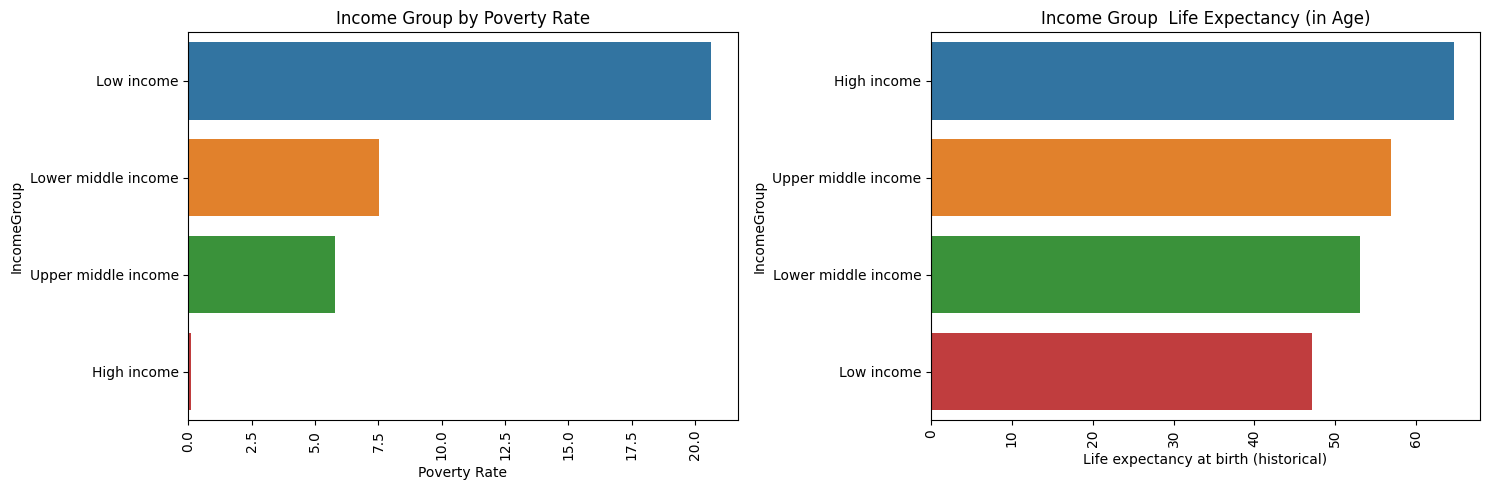

In [32]:
# Group statistics by Population and Life data and sort their value by the Poverty Rate

Group_Pop_Income = Pop1.groupby("IncomeGroup").mean().reset_index().sort_values(by = "Poverty Rate",
                                                                               ascending=False).head(5)
Group_Life_Income = Life1.groupby("IncomeGroup").mean().reset_index().sort_values(
    by="Life expectancy at birth (historical)",ascending=False).head(5)


# Create a figure with two subplots
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))

# Plot the first bar chart on the left subplot
sns.barplot(x='Poverty Rate', y='IncomeGroup', data=Group_Pop_Income, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_title('Income Group by Poverty Rate')

# Plot the second bar chart on the right subplot
sns.barplot(x='Life expectancy at birth (historical)', y='IncomeGroup', data=Group_Life_Income, ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_title('Income Group  Life Expectancy (in Age)')

plt.tight_layout()

# Display the figure
plt.show()



The analysis shows that lower-income countries have a higher poverty index and lower life expectancy, while higher-income countries have lower poverty indexes and higher life expectancy. This pattern is consistent with previous research and highlights the importance of economic development in improving the standard of living for individuals in a country. Additionally, the analysis shows regional differences in poverty and life expectancy, indicating the need for targeted policies and interventions to address these issues.

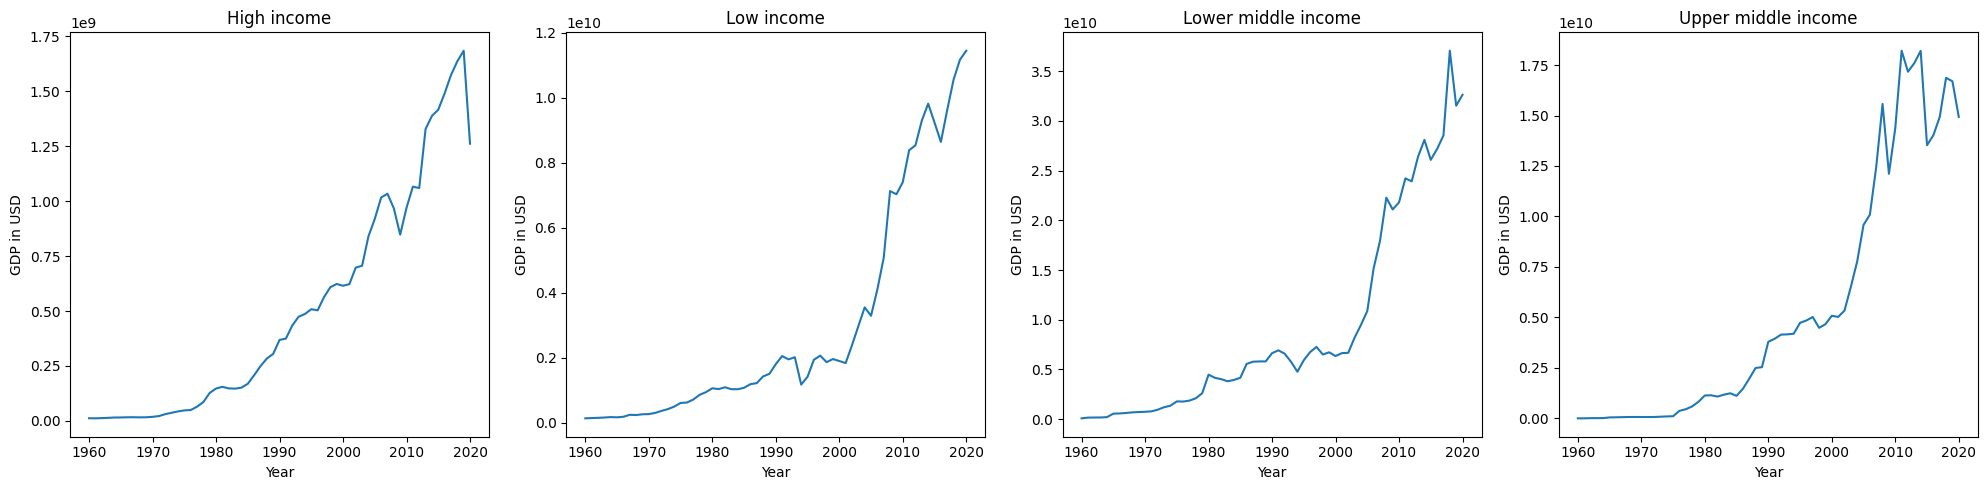

In [33]:
# Group GDP by IncomeGroup and calculate median for each year
Median_Gdp1 = Gdp1.iloc[:,:-2].groupby("IncomeGroup").median().T

# Create a figure with subplots
fig, axes = plt.subplots(ncols=len(Median_Gdp1.columns), figsize=(20, 5))

# Plot each income group's GDP on a separate subplot
for i, col in enumerate(Median_Gdp1.columns):
    sns.lineplot(x=Median_Gdp1.index, y=col, data=Median_Gdp1, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('GDP in USD')

plt.tight_layout()

# Display the figure
plt.show()

This code creates a line plot of GDP over time for each income group, using data from the Gdp1 dataframe.

First, the code uses the iloc method to select all columns except for the last two (which contain metadata). Then it groups the resulting data by the "IncomeGroup" column and calculates the median GDP for each year using the median method. The resulting median GDP data is transposed (using the T method) so that the years are the index and the income groups are the columns.

Next, the code creates a figure with a separate subplot for each income group using the subplots function from Matplotlib. It then loops over each column (i.e., income group) in the median GDP data and plots the corresponding data on the appropriate subplot using the lineplot function from Seaborn. The set_title, set_xlabel, and set_ylabel methods are used to set the titles and axis labels for each subplot.

Finally, the code uses the tight_layout method to ensure that the subplots do not overlap, and displays the resulting figure using the show method.

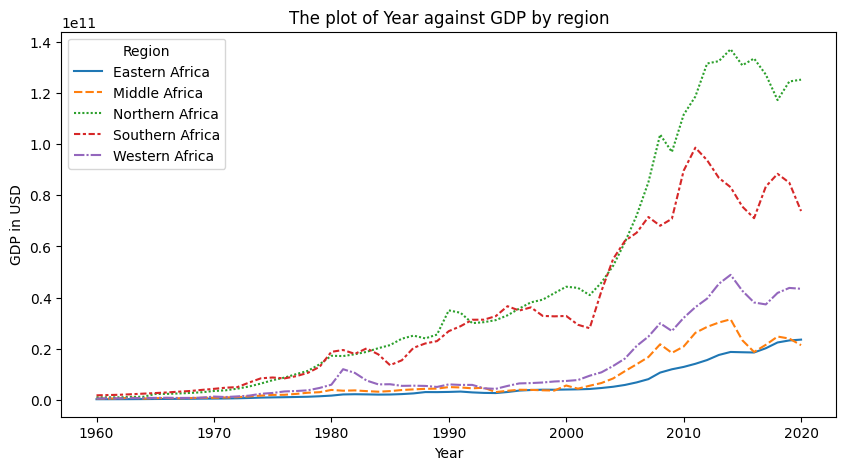

In [34]:
# plot the Mean GDP per region over since 1960

Mean_Gdp1 = Gdp1.iloc[:,:-2].groupby("Region").mean().T
plt.figure(figsize=(10, 5))
sns.lineplot(data=Mean_Gdp1, legend="brief")
plt.title('The plot of Year against GDP by region')
plt.xlabel("Year")
plt.ylabel("GDP in USD")
plt.show()


This code aggregates the GDP data by region using the groupby method from the pandas library. It then calculates the mean GDP value for each region over time using the mean method and transposes the result using .T.

The resulting dataframe is then plotted using the sns.lineplot function from the seaborn library to show the trend of GDP for each region over time. The resulting plot has the year on the x-axis and the GDP in USD on the y-axis. The plt.title method is used to give the plot a title, and plt.xlabel and plt.ylabel methods are used to label the axes.

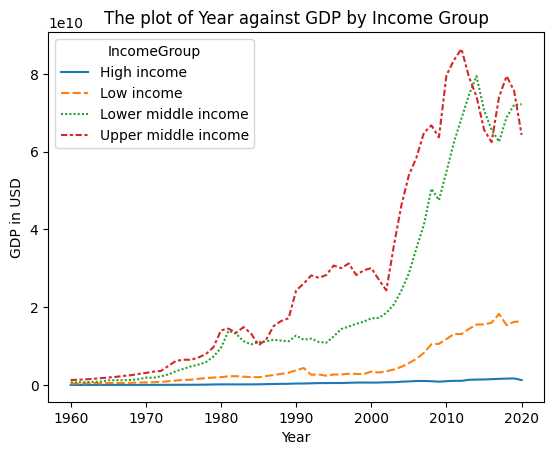

In [35]:
# plot the Mean GDP per Income Group over since 1960

Mean_Gdp1 = Gdp1.iloc[:,:-2].groupby("IncomeGroup").mean().T

sns.lineplot(Mean_Gdp1)
plt.title('The plot of Year against GDP by Income Group')
plt.xlabel("Year")
plt.ylabel("GDP in USD")
plt.show()

This code calculates the mean GDP for each income group over time using the groupby method and the mean function. It then plots the mean GDP for each income group using a line plot with different colors for each income group. Finally, it sets the plot title and axis labels and displays the plot using the plt.show() function.

# Correlation

Correlation is a statistical measure that describes the strength of the relationship between two variables. It ranges from -1 to +1, where -1 indicates a perfect negative correlation, 0 indicates no correlation, and +1 indicates a perfect positive correlation.

A positive correlation means that as one variable increases, so does the other, while a negative correlation means that as one variable increases, the other decreases.

Correlation is often used to analyze the relationship between different variables in a dataset, and it can help identify patterns and relationships that may not be immediately apparent.

In [36]:
# Forming New DataFrame based on need

new_dataset = round(Total_dataset[["Country Name","IncomeGroup","Mean GDP","PrePoverty Rate","Poverty Rate","Life expectancy at birth (historical)"]].groupby("Country Name").mean(),2)
new_dataset_reg = round(Total_dataset[["Region","IncomeGroup","Mean GDP","PrePoverty Rate","Poverty Rate","Life expectancy at birth (historical)"]].groupby("Region").mean(),2)
new_dataset_inc = round(Total_dataset[["Country Name","IncomeGroup","Mean GDP","PrePoverty Rate","Poverty Rate","Life expectancy at birth (historical)"]].groupby("IncomeGroup").mean(),2)


The code block above creates three new datasets (new_dataset, new_dataset_reg, and new_dataset_inc) from an existing dataset called Total_dataset.

The Total_dataset contains data on several variables such as Country Name, Region, IncomeGroup, Mean GDP, PrePoverty Rate, Poverty Rate, and Life expectancy at birth (historical).

The first new dataset, new_dataset, is created by grouping Total_dataset by Country Name and taking the mean of IncomeGroup, Mean GDP, PrePoverty Rate, Poverty Rate, and Life expectancy at birth (historical) for each country. The round() function is used to round off all values to two decimal places.

The second new dataset, new_dataset_reg, is created by grouping Total_dataset by Region and taking the mean of IncomeGroup, Mean GDP, PrePoverty Rate, Poverty Rate, and Life expectancy at birth (historical) for each region. Again, round() is used to round off all values to two decimal places.

The third new dataset, new_dataset_inc, is created by grouping Total_dataset by IncomeGroup and taking the mean of Country Name, Mean GDP, PrePoverty Rate, Poverty Rate, and Life expectancy at birth (historical) for each income group. round() is used to round off all values to two decimal places.

These new datasets provide a summary of the original dataset by grouping the data based on the variables of interest and taking the mean of other variables. This helps in getting a better understanding of how the variables are related to each other and identifying any trends or patterns in the data.

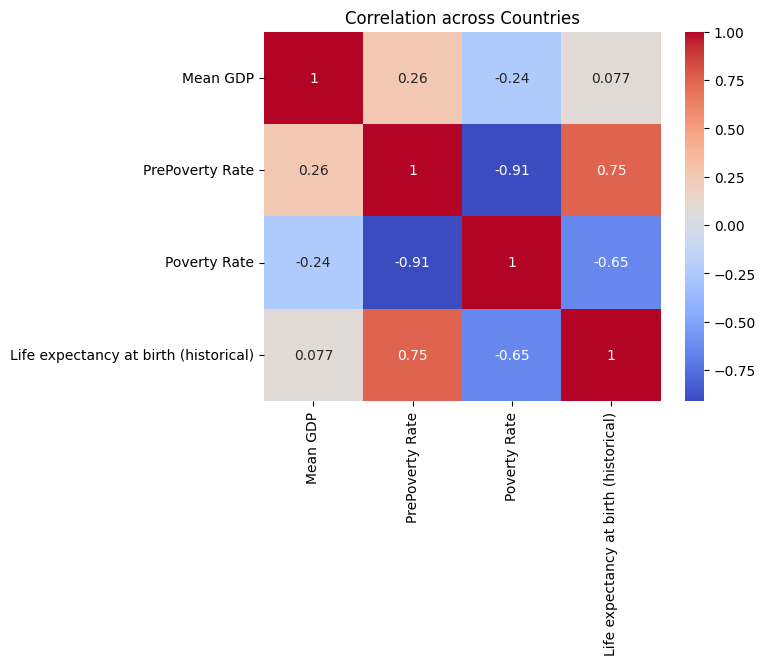

In [37]:
# Correlation of the Various Metrics across Countries

plt.title("Correlation across Countries")
sns.heatmap(new_dataset.corr(), annot=True, cmap= 'coolwarm')
plt.show()


This code snippet likely produces a heatmap plot of the correlation matrix between various metrics across different countries, using the new_dataset data as input.

The plt.title function sets the title of the plot as "Correlation across Countries". The sns.heatmap function creates a heatmap using the correlation matrix calculated from new_dataset.corr(). The annot=True argument adds the numerical values of the correlation coefficients to the heatmap, and cmap='coolwarm' specifies the color map to use for the heatmap.

Finally, plt.show() displays the plot.

Note that new_dataset likely contains data on different metrics (such as GDP, population, life expectancy, etc.) for various countries. The correlation matrix shows how strongly or weakly these metrics are related to each other across all the countries in the dataset. A positive correlation coefficient indicates a positive relationship between the two metrics (i.e., when one increases, the other tends to increase as well), while a negative correlation coefficient indicates a negative relationship (i.e., when one increases, the other tends to decrease). A coefficient of 0 indicates no correlation.

<AxesSubplot: title={'center': 'Correlation across Regions'}>

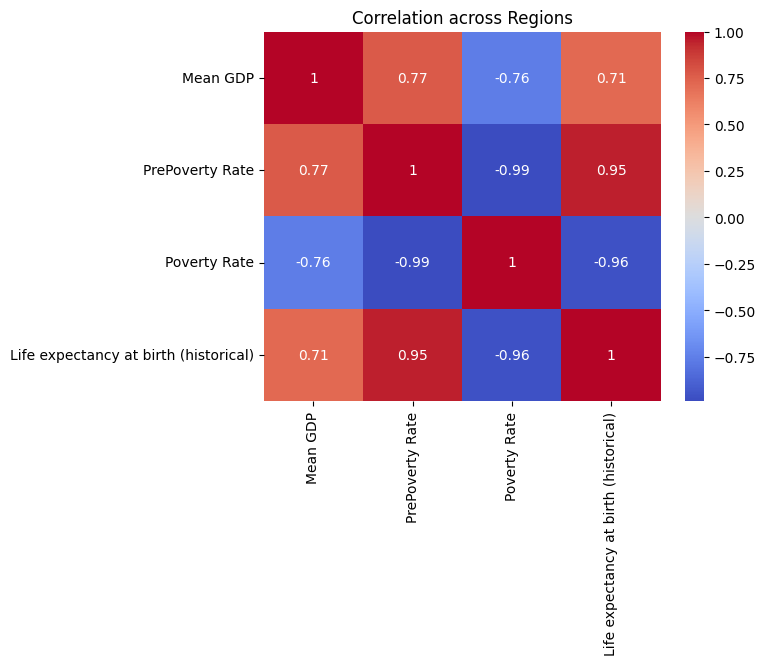

In [38]:
# Correlation Across Regions


plt.title('Correlation across Regions')
sns.heatmap(new_dataset_reg.corr(), annot=True, cmap="coolwarm")


3 / 3

This code snippet likely creates a heatmap plot showing the correlation matrix between different metrics across different regions.

The plt.title function sets the title of the plot as "Correlation across Regions". The sns.heatmap function creates a heatmap using the correlation matrix calculated from new_dataset_reg.corr(). The annot=True argument adds the numerical values of the correlation coefficients to the heatmap, and cmap='coolwarm' specifies the color map to use for the heatmap.

Note that new_dataset_reg is likely a subset of the new_dataset dataset, containing only data on various metrics for different regions (e.g., North America, Europe, Asia, etc.). The correlation matrix calculated from new_dataset_reg.corr() shows how strongly or weakly these metrics are related to each other across all the regions in the dataset. As with the previous code snippet, a positive correlation coefficient indicates a positive relationship between the two metrics, while a negative correlation coefficient indicates a negative relationship, and a coefficient of 0 indicates no correlation.

<AxesSubplot: title={'center': 'Correlation across Income Group'}>

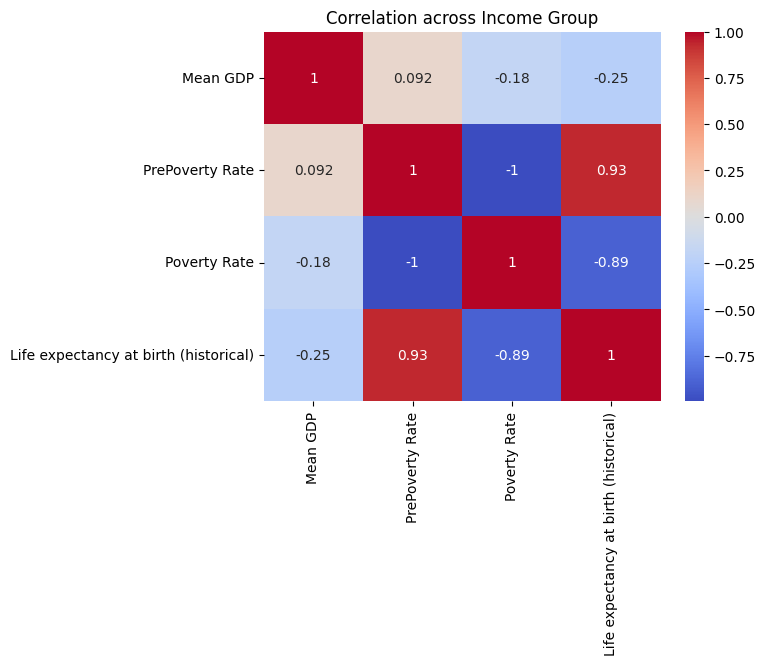

In [39]:
# Correlation Across Regions


plt.title('Correlation across Income Group')
sns.heatmap(new_dataset_inc.corr(), annot=True, cmap="coolwarm")

This code snippet likely creates a heatmap plot showing the correlation matrix between different metrics across different income groups.

The plt.title function sets the title of the plot as "Correlation across Income Group". The sns.heatmap function creates a heatmap using the correlation matrix calculated from new_dataset_inc.corr(). The annot=True argument adds the numerical values of the correlation coefficients to the heatmap, and cmap='coolwarm' specifies the color map to use for the heatmap.

Note that new_dataset_inc is likely a subset of the new_dataset dataset, containing only data on various metrics for different income groups (e.g., high-income countries, middle-income countries, low-income countries, etc.). The correlation matrix calculated from new_dataset_inc.corr() shows how strongly or weakly these metrics are related to each other across all the income groups in the dataset. As with the previous code snippets, a positive correlation coefficient indicates a positive relationship between the two metrics, while a negative correlation coefficient indicates a negative relationship, and a coefficient of 0 indicates no correlation.

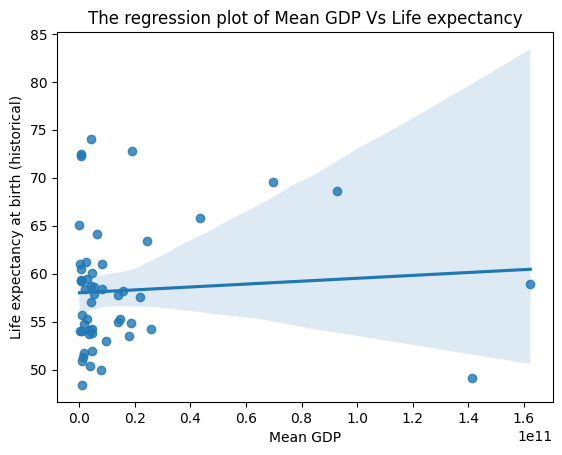

In [40]:
sns.regplot(data = new_dataset, x = "Mean GDP", y= "Life expectancy at birth (historical)")
plt.title("The regression plot of Mean GDP Vs Life expectancy")
plt.show()

This code snippet likely creates a scatter plot with a regression line showing the relationship between the "Mean GDP" and "Life expectancy at birth (historical)" variables.

The sns.regplot function creates a scatter plot with a regression line using the new_dataset dataset as input, with "Mean GDP" on the x-axis and "Life expectancy at birth (historical)" on the y-axis. The plt.title function sets the title of the plot as "The regression plot of Mean GDP Vs Life expectancy". Finally, plt.show() displays the plot.

Note that the regression line shows the overall trend in the relationship between the two variables - whether they are positively or negatively correlated and how strong the relationship is. A positive slope in the regression line indicates a positive correlation between the two variables (i.e., when Mean GDP increases, Life expectancy at birth also tends to increase), while a negative slope indicates a negative correlation. The strength of the correlation can be gauged by the steepness of the regression line and the closeness of the data points to the line.

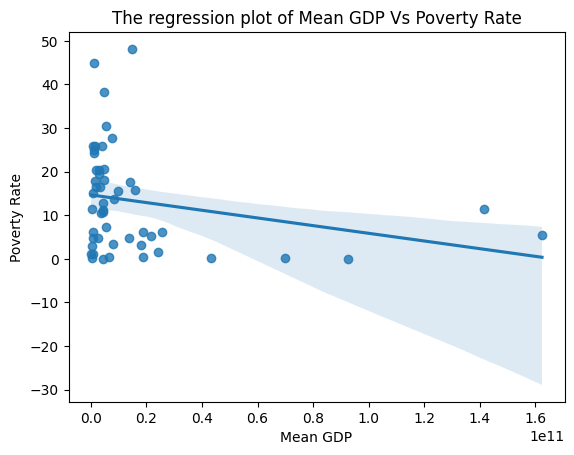

In [41]:
sns.regplot(data = new_dataset, x = "Mean GDP", y= "Poverty Rate")
plt.title("The regression plot of Mean GDP Vs Poverty Rate")
plt.show()

This code snippet likely creates a scatter plot with a regression line showing the relationship between the "Mean GDP" and "Poverty Rate" variables.

The sns.regplot function creates a scatter plot with a regression line using the new_dataset dataset as input, with "Mean GDP" on the x-axis and "Poverty Rate" on the y-axis. The plt.title function sets the title of the plot as "The regression plot of Mean GDP Vs Poverty Rate". Finally, plt.show() displays the plot.

The regression line will show the overall trend in the relationship between the two variables. A positive slope in the regression line would indicate that as Mean GDP increases, the Poverty Rate tends to decrease, suggesting a negative correlation between the two variables. Conversely, a negative slope in the regression line would indicate a positive correlation, meaning that as Mean GDP increases, the Poverty Rate tends to increase. The strength of the correlation can be evaluated based on the steepness of the regression line and the proximity of the data points to the line.

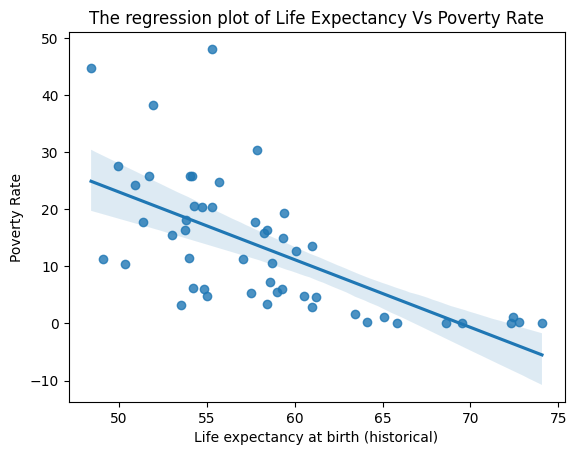

In [51]:
sns.regplot(data = new_dataset, x = "Life expectancy at birth (historical)", y= "Poverty Rate",)
plt.title("The regression plot of Life Expectancy Vs Poverty Rate")
plt.show()

This code snippet likely creates a scatter plot with a regression line showing the relationship between the "Life expectancy at birth (historical)" and "Poverty Rate" variables.

The sns.regplot function creates a scatter plot with a regression line using the new_dataset dataset as input, with "Life expectancy at birth (historical)" on the x-axis and "Poverty Rate" on the y-axis. The plt.title function sets the title of the plot as "The regression plot of Life Expectancy Vs Poverty Rate". Finally, plt.show() displays the plot.

The regression line will show the overall trend in the relationship between the two variables. A positive slope in the regression line would indicate that as Life expectancy at birth (historical) increases, the Poverty Rate tends to decrease, suggesting a negative correlation between the two variables. Conversely, a negative slope in the regression line would indicate a positive correlation, meaning that as Life expectancy at birth (historical) increases, the Poverty Rate tends to increase. The strength of the correlation can be evaluated based on the steepness of the regression line and the proximity of the data points to the line.

In [43]:
# When the data is caetgorized by countries

correlation = new_dataset.corr()
correlation

,Mean GDP,PrePoverty Rate,Poverty Rate,Life expectancy at birth (historical)
Mean GDP,1.000000,0.259171,-0.244955,0.077187
PrePoverty Rate,0.259171,1.000000,-0.910518,0.753023
Poverty Rate,-0.244955,-0.910518,1.000000,-0.645409
Life expectancy at birth (historical),0.077187,0.753023,-0.645409,1.000000


In [44]:
# When the data is categorzied by income group

correlation_I = new_dataset_inc.corr()
correlation_I

,Mean GDP,PrePoverty Rate,Poverty Rate,Life expectancy at birth (historical)
Mean GDP,1.000000,0.091541,-0.178580,-0.249955
PrePoverty Rate,0.091541,1.000000,-0.995874,0.931463
Poverty Rate,-0.178580,-0.995874,1.000000,-0.894893
Life expectancy at birth (historical),-0.249955,0.931463,-0.894893,1.000000


In [45]:
# When the data is categorized by Region

correlation_R = new_dataset_reg.corr()
correlation_R

,Mean GDP,PrePoverty Rate,Poverty Rate,Life expectancy at birth (historical)
Mean GDP,1.000000,0.770505,-0.761309,0.714211
PrePoverty Rate,0.770505,1.000000,-0.988996,0.950491
Poverty Rate,-0.761309,-0.988996,1.000000,-0.959231
Life expectancy at birth (historical),0.714211,0.950491,-0.959231,1.000000
